In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
with open('/home/czewian/SI/imo/IMO/lab/data/kroa200.tsp', 'r') as f:
    lines = f.readlines()
    data = np.zeros((200, 2), dtype=int)
    for line in lines:
        words = line.split(' ')
        try:
            it = int(words[0])
            data[it - 1] = np.array([int(words[1]), int(words[2])])
        except:
            continue
data[:3]

array([[1357, 1905],
       [2650,  802],
       [1774,  107]])

In [18]:
matrix = np.zeros((200, 200), dtype=int)

for i in range(200):
    for j in range(200):
        if i == j:
            matrix[i][j] = 1e9
        else:
            xa = data[i,0]
            xb = data[j,0]
            ya = data[i,1]
            yb = data[j,1]
            matrix[i][j] = int(np.sqrt((xa - xb)**2 + (ya - yb)**2) + 0.5)

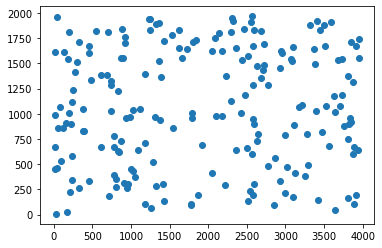

In [19]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [20]:
cycleA = []
cycleB = []

left_down = np.argmin(data[:, 0] * data[:,1])
right_up = np.argmax(data[:, 0] * data[:,1])

In [21]:
cycleA = [i for i in range(100)]
cycleB = [i + 100 for i in range(100)]

impr = True
_max = -1e9
_global_max = _max
while impr:
    impr = False
    move = None
    best_move = None
    _max = -1e9
    for i in range(len(cycleA)):
        for j in range(len(cycleB)):
            a, b = cycleA[i],cycleB[j]
            cycleA[i] = b
            cycleB[j] = a
            
            ma = np.average(data[cycleA], axis=0)
            mb = np.average(data[cycleB], axis=0)
            
            cycleA[i] = a
            cycleB[j] = b            

            
            if np.sqrt(np.sum((ma - mb)**2)) > _max:
                best_move = [cycleA[i],cycleB[j]]
                _max = np.sqrt(np.sum((ma - mb)**2))
                # print(move)

    if best_move is not None and _max > _global_max:
        cycleA.remove(best_move[0])
        cycleB.remove(best_move[1])
        cycleA.append(best_move[1])
        cycleB.append(best_move[0])
        _global_max = _max
        impr = True

y = np.zeros(200, dtype=int)
y[cycleA] = 1
y[cycleB] = 0

plt.scatter(data[:,0], data[:,1], c=y)
plt.show()

KeyboardInterrupt: 

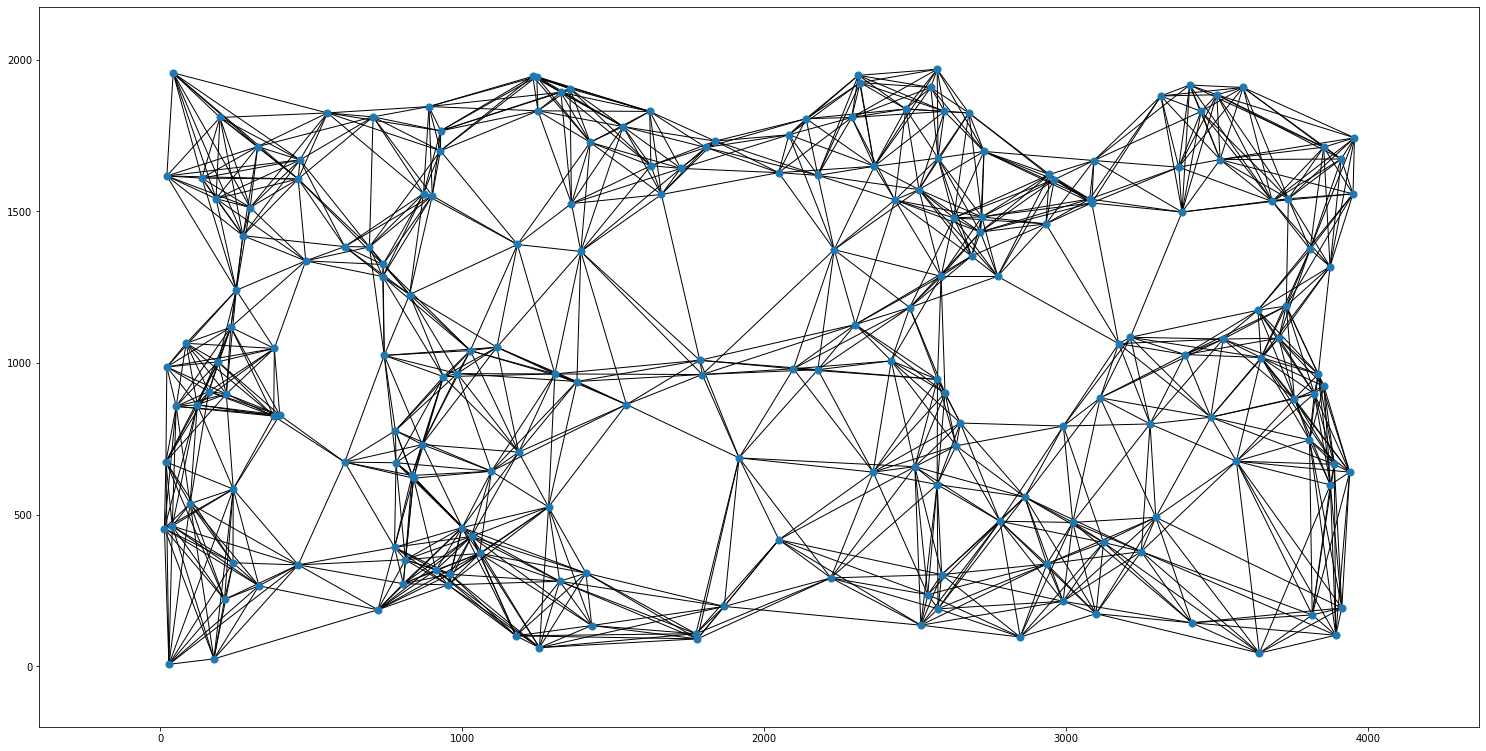

In [23]:
import networkx as nx
import json

with open('/home/czewian/SI/imo/IMO/lab/resultFiles/results_lab_7.json', 'r') as f:
    edges = json.loads(f.read())["adj"]

points = tuple(map(tuple, data))
G = nx.Graph()
for i, u in enumerate(edges):
    for j, v in enumerate(edges[i]):
        G.add_edge(points[i], points[v])

pos = {point: point for point in points}       

fig = plt.figure(figsize=(20,10))
nx.draw(G, pos, node_size=50)
plt.axis("on")
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

plt.show()